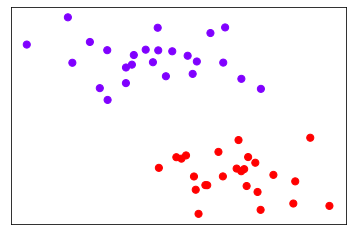

In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
X, y = make_blobs(n_samples = 50, centers = 2, random_state =0, cluster_std = 0.6)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')
plt.xticks([])
plt.yticks([])
plt.show()

## Draw decision boundary:

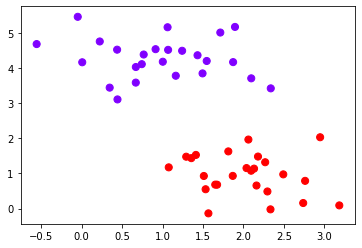

In [2]:
#need scatter plot:

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap = 'rainbow')

ax = plt.gca() #get the current subpolt, if not exist, create new one
xlim = ax.get_xlim() #get_xlim返回当前Axes视图的x的上下限, get_ylim同
ylim = ax.get_ylim() #default create(0.0, 1.0) range axis


#plot decision boundary, we need grid!
axisx = np.linspace(xlim[0], xlim[1], 30)
axisy = np.linspace(ylim[0], ylim[1], 30)
axisy, axisx = np.meshgrid(axisy, axisx)

#covert features into feature metrics
#need two feature vector in order to get y.shape * x.shapte's x-axis and y-axis.
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
#get y.shape * x.shapte's axis point
#ravel() is reduced dimension function, vstack can plot multiple same structure 1-D plot combine 
#xy是已经形成的网络，它是遍布在整个画布上密集的点

In [3]:
a = np.array([1, 2, 3])
b = np.array([7, 8])

#after combine, we will have (1, 7), (2,7), (3, 7), (1,8), (2,8), (3,8)

In [4]:
v1, v2 = np.meshgrid(a,b)
v= np.vstack([v1.ravel(), v2.ravel()]).T
v

array([[1, 7],
       [2, 7],
       [3, 7],
       [1, 8],
       [2, 8],
       [3, 8]])

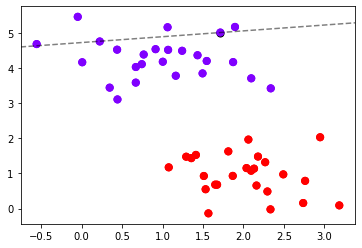

In [5]:
#modeling: using fit() to calculate the decision boundary

clf = SVC(kernel = "linear").fit(X,y)
P = clf.decision_function(xy).reshape(axisx.shape)

#充要接口decision_function, 返回每个输入的样本所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构
#画出决策边界和平行于决策边界的超平面

ax.contour(axisx, axisy, P
          , colors = "k"
          , levels = [-1, 0, 1]
          , alpha = 0.5
          , linestyles = ['--', '-','--'])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

#记得Z的本质么?是输入的样本到决策边界的距离，而contour函数中的level其实是输入了这个距离 #让我们用一个点来试试看
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow") 
plt.scatter(X[10,0],X[10,1],c="black",s=50,cmap="rainbow")

clf.decision_function(X[10].reshape(1,2)) 
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow") 
ax = plt.gca()

ax.contour(axisx,axisy,P
            ,colors="k" 
            ,levels=[-3.33917354]
            ,alpha=0.5
            ,linestyles=["--"])

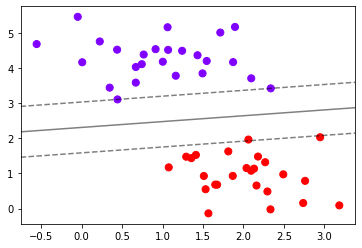

In [6]:
#to seal the above process into an function
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"]) 
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    #ploting process can be written as:
clf = SVC(kernel = "linear").fit(X,y) 
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow") 
plot_svc_decision_function(clf)

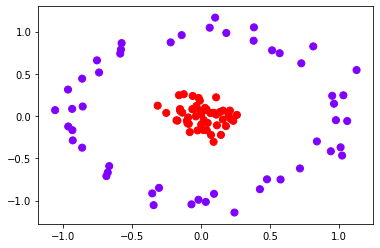

In [7]:
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=0.1, noise=.1)

X.shape 
y.shape

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow") 
plt.show()

In [8]:
X.shape 

(100, 2)

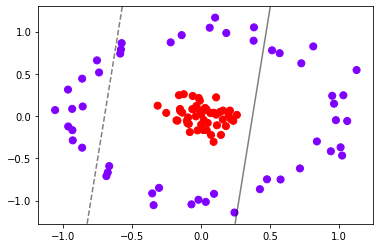

In [9]:
clf = SVC(kernel = "linear").fit(X,y)  #previous classification cannot determin decision boundary for this circle plot

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow") 

plot_svc_decision_function(clf)

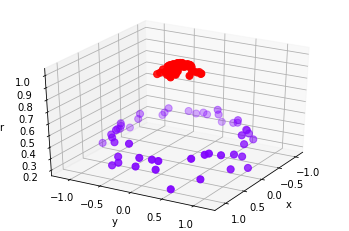

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30, 60, 90), value=30), IntSlider(valu…

In [10]:
#define a new dimension r

r = np.exp(-(X**2).sum(1))

rlim = np.linspace(min(r), max(r), 1)

from mpl_toolkits import mplot3d

#define a funtion to graph 3D- plot
#elev means the Angle of rotation up and down
#azim means paralleal rotation angle

def plot_3d(elev =30, azim = 30, X = X, y = y):
    
    ax = plt.subplot(projection = "3d")
    
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow') 
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y") 
    ax.set_zlabel("r") 
    plt.show()

plot_3d()  #set plot_3d(elev=90) we will see the same plot as 2D shows

from ipywidgets import interact,fixed 
interact(plot_3d,elev=[0,30,60,90],azip=(-180,180),X=fixed(X),y=fixed(y)) 
plt.show()

## 1.Explore kernal function performance in different dataset

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.datasets import make_circles, make_moons, make_blobs, make_classification
#circult, linear, cluster, classification datasets
import warnings
warnings.filterwarnings('ignore')

In [12]:
n_samples = 100
datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0), 
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1), 
    make_blobs(n_samples=n_samples, centers=2, random_state=5), 
    make_classification(n_samples=n_samples,n_features = 2,n_informative=2,n_redundant=0, random_state=5)
    #classification must define n-features and n_informative (how many feature has information), and n_redundant(how many features has no information)
    ]

Kernel = ["linear","poly","rbf","sigmoid"] #4 kernal functions * 4 datasets = 16 graphs
#四个数据集分别是什么样子呢? 

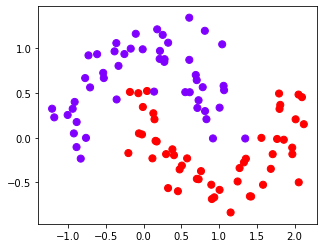

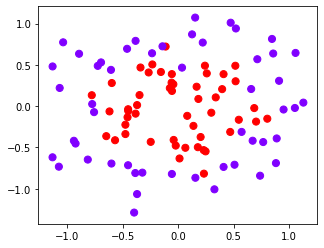

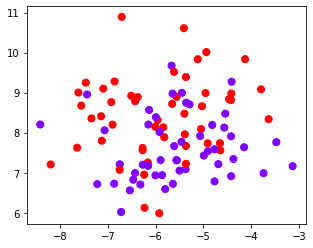

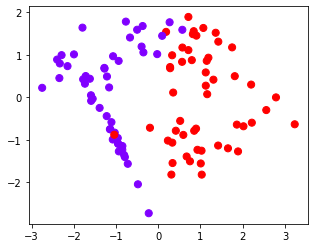

In [13]:
for X,Y in datasets:
    plt.figure(figsize=(5,4)) 
    plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")

### Graph subplot: gridplot

In [14]:
nrows=len(datasets)
ncols=len(Kernel) + 1

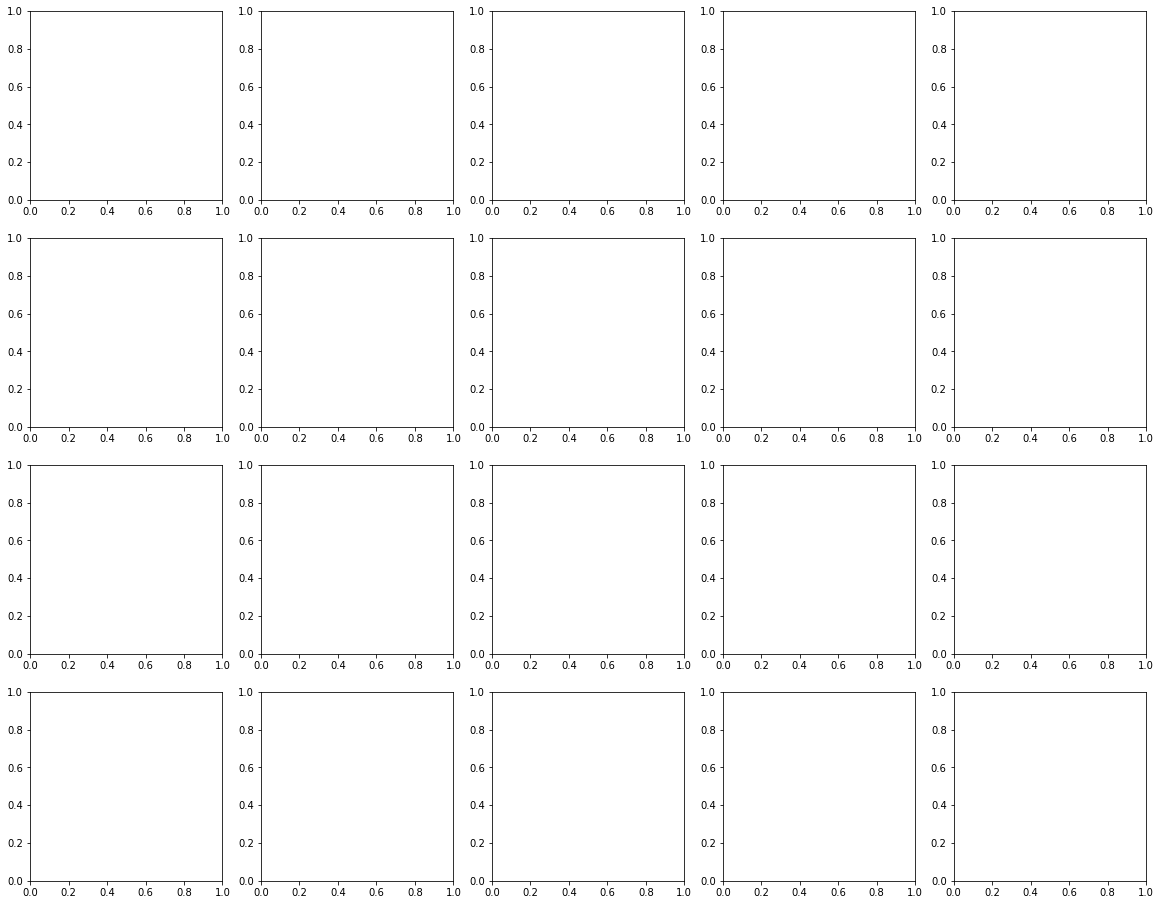

In [15]:
fig, axes = plt.subplots(nrows, ncols, figsize = (20,16)) #4 row * 5 cols

### First loop: loop in different datasets, second loop: loop in different kernal functions.

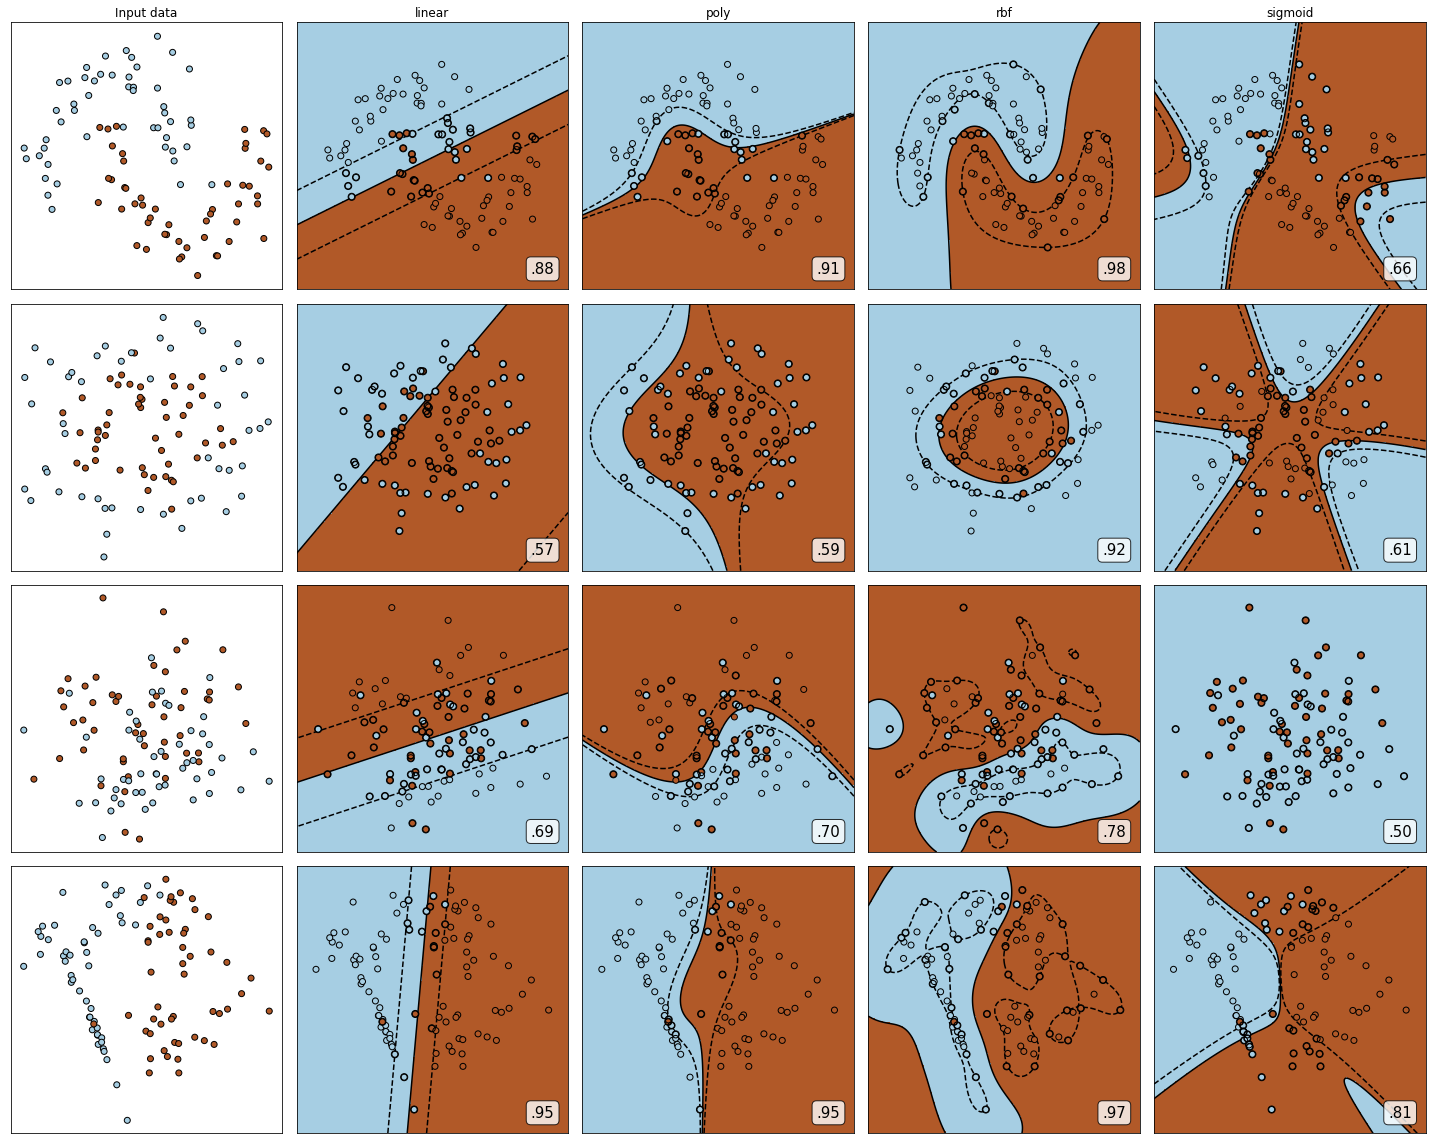

In [16]:
nrows=len(datasets)
ncols=len(Kernel) + 1


fig, axes = plt.subplots(nrows, ncols, figsize = (20,16)) #4 row * 5 cols

for ds_cnt, (X,Y) in enumerate(datasets):
#in subplot first column, place original datasets distribution
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,edgecolors='k') 
    ax.set_xticks(())
    ax.set_yticks(())

    #in second loop, start from second column, place classification result

    for est_idx, kernel in enumerate(Kernel):  #using [*enumerate(datasets)] to open: map, zip ...
        
        #define subplot location
        ax = axes[ds_cnt, est_idx + 1]
        
        #modeling
        clf = SVC(kernel=kernel, gamma=2).fit(X,Y) #instantiate and fit
        score = clf.score(X, Y) #see training set score only 

        #graph original scatter plot for datasets
        ax.scatter(X[:, 0], X[:, 1], c=Y
                    ,zorder=10
                    ,cmap=plt.cm.Paired,edgecolors='k') 

        #graph svm, facecolor = none means transparents. but larger than original dot,
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50, facecolors='none', zorder=10, edgecolors='k')

        #graph decision boundary: need to get a little but larger than max and min dot.(not cover)
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5


        #np.mgrid，combine np.linspace and np.meshgrid 
        #using upper and lower boundary to graph meshgrid
        #Means[START:STOP:STEP] 
        #if step is plural，itegred part = count dots between start num and stop num，(stop num inclusively)
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] #plural+stop num include.

        #np.c_，similar to np.vstack : Z = distiance
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape) 

        #fill contour line color in different region
        ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)

        #graph contour line : Z = heigh
        ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

        #define axesx not showing 
        ax.set_xticks(()) 
        ax.set_yticks(())

        #title in first column head
        if ds_cnt == 0:
            ax.set_title(kernel)

        #add accuracy score for different classification plot
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0')
               , size = 15
               , bbox = dict(boxstyle = 'round', alpha = 0.8, facecolor = 'white')
               #add a white box for score
               ,transform = ax.transAxes #target text box in axes, which is ax-subplot itself
               ,horizontalalignment = 'right'
               )

plt.tight_layout()
plt.show()

## Breast_cancer dataset

In [36]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime

In [18]:
data = load_breast_cancer() 

X = data.data
y = data.target

X.shape 

(569, 30)

In [19]:
np.unique(y)

array([0, 1])

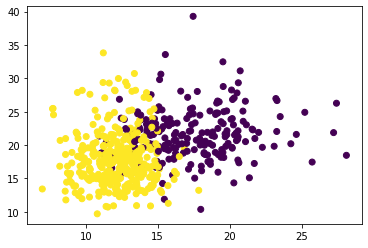

In [20]:
plt.scatter(X[:,0],X[:,1],c=y) 
plt.show()

In [22]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
Kernel = ["linear","rbf","sigmoid"]

In [ ]:
'''
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
            # , degree = 1, cache_size = how many memory you allow to use 
             , cache_size=5000 ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest))) 
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
'''

The accuracy under kernel linear is 0.929825
00:00:380694


In [23]:
now = time()

In [24]:
datetime.datetime.fromtimestamp(now).strftime("%Y-%m-%d, %H:%M:%S:%f")

'2020-04-21, 13:33:04:036006'

In [ ]:
'''
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
             , degree = 1 
             , cache_size=5000 ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest))) 
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
'''

#### The accuracy for rbf and linear have huge different, let's look at the data for reason. 

In [25]:
import pandas as pd
data = pd.DataFrame(X)

data.describe([0.01, 0.05, 0.1, 0.5, 0.75, 0.99]).T

#Among 30 different features, some of the features have huge differents than the others,
# So we need to normalize the data. (from mean & std we can see)
# Data skewed - we can normalized the data through (0,1) range:

,count,mean,std,min,1%,5%,10%,50%,75%,99%,max
0,569.0,14.127292,3.524049,6.981000,8.458360,9.529200,10.260000,13.370000,15.780000,24.371600,28.11000
1,569.0,19.289649,4.301036,9.710000,10.930400,13.088000,14.078000,18.840000,21.800000,30.652000,39.28000
2,569.0,91.969033,24.298981,43.790000,53.827600,60.496000,65.830000,86.240000,104.100000,165.724000,188.50000
3,569.0,654.889104,351.914129,143.500000,215.664000,275.780000,321.600000,551.100000,782.700000,1786.600000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.068654,0.075042,0.079654,0.095870,0.105300,0.132888,0.16340
5,569.0,0.104341,0.052813,0.019380,0.033351,0.040660,0.049700,0.092630,0.130400,0.277192,0.34540
6,569.0,0.088799,0.079720,0.000000,0.000000,0.004983,0.013686,0.061540,0.130700,0.351688,0.42680
7,569.0,0.048919,0.038803,0.000000,0.000000,0.005621,0.011158,0.033500,0.074000,0.164208,0.20120
8,569.0,0.181162,0.027414,0.106000,0.129508,0.141500,0.149580,0.179200,0.195700,0.259564,0.30400
9,569.0,0.062798,0.007060,0.049960,0.051504,0.053926,0.055338,0.061540,0.066120,0.085438,0.09744


In [27]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

#this step help to scaler all data into range (0,1) --- regulalization

In [28]:
data = pd.DataFrame(X)
data.describe([0.01, 0.05, 0.1, 0.5, 0.75, 0.99]).T

,count,mean,std,min,1%,5%,10%,50%,75%,99%,max
0,569.0,-3.162867e-15,1.00088,-2.029648,-1.610057,-1.305923,-1.098366,-0.215082,0.469393,2.909529,3.971288
1,569.0,-6.530609e-15,1.00088,-2.229249,-1.945253,-1.443165,-1.212786,-0.104636,0.584176,2.644095,4.651889
2,569.0,-7.078891e-16,1.00088,-1.984504,-1.571053,-1.296381,-1.076672,-0.235980,0.499677,3.037982,3.976130
3,569.0,-8.799835e-16,1.00088,-1.454443,-1.249201,-1.078225,-0.947908,-0.295187,0.363507,3.218702,5.250529
4,569.0,6.132177e-15,1.00088,-3.112085,-1.971730,-1.517125,-1.188910,-0.034891,0.636199,2.599511,4.770911
5,569.0,-1.120369e-15,1.00088,-1.610136,-1.345369,-1.206849,-1.035527,-0.221940,0.493857,3.275782,4.568425
6,569.0,-4.421380e-16,1.00088,-1.114873,-1.114873,-1.052316,-0.943046,-0.342240,0.526062,3.300560,4.243589
7,569.0,9.732500e-16,1.00088,-1.261820,-1.261820,-1.116837,-0.974010,-0.397721,0.646935,2.973759,3.927930
8,569.0,-1.971670e-15,1.00088,-2.744117,-1.885853,-1.448032,-1.153036,-0.071627,0.530779,2.862418,4.484751
9,569.0,-1.453631e-15,1.00088,-1.819865,-1.600987,-1.257643,-1.057477,-0.178279,0.470983,3.209454,4.910919


In [34]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

Kernel = ["linear","poly","rbf","sigmoid"]

for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
             , degree = 1
             , cache_size=5000 ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest))) 
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.976608
00:00:004188
The accuracy under kernel poly is 0.964912
00:00:003445
The accuracy under kernel rbf is 0.970760
00:00:005337
The accuracy under kernel sigmoid is 0.953216
00:00:004537


In [ ]:
#After regulization, the time speed up!
#Accuracy for rbf increase a lot!
#Thus, Normalization is very very important before SVM!!!!
#But show we choose linear or rbf???

### Parameters: Gamma can be adjusted so let's graph and find the best gamma. 

0.9766081871345029 0.012067926406393264


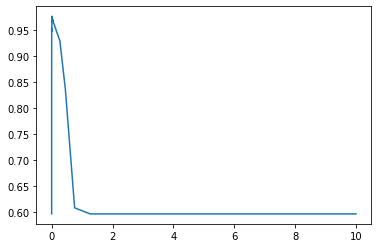

In [38]:
#rbf can tune Gamma: 
score = []
gamma_range = np.logspace(-10, 1, 50) #返回在对数刻度上均匀间隔的数字 

for i in gamma_range:
    clf = SVC(kernel="rbf",gamma = i,cache_size=5000).fit(Xtrain,Ytrain) 
    score.append(clf.score(Xtest,Ytest))

print(max(score), gamma_range[score.index(max(score))]) 

plt.plot(gamma_range,score)
plt.show()
#at this time, rbf and linear reach the same accuracy with best gamma 0.012

In [40]:
#Poly can tune : Gamma and Degree 
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import GridSearchCV #CV with Grid

time0 = time()

gamma_range = np.logspace(-10,1,20)
coef0_range = np.linspace(0,5,10)

param_grid = {'gamma': gamma_range
                  ,'coef0': coef0_range}

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=420) 

grid = GridSearchCV(SVC(kernel = "poly",degree=1,cache_size=5000), 
                    param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.5f" % (grid.best_params_, grid.best_score_)) 
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The best parameters are {'coef0': 0.0, 'gamma': 0.18329807108324375} with a score of 0.96959
00:05:703795


### Paramater C: The marginal maximization of the decision function

0.9766081871345029 0.2136734693877551


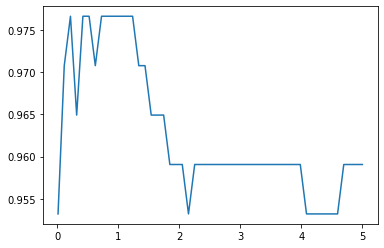

In [42]:
# C tune for linear SVM
score = []
C_range = np.linspace(0.01,5,50) 

for i in C_range:
    clf = SVC(kernel="linear",C=i,cache_size=5000).fit(Xtrain,Ytrain) 
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), C_range[score.index(max(score))]) 
plt.plot(C_range,score)
plt.show()

0.9824561403508771 6.130408163265306


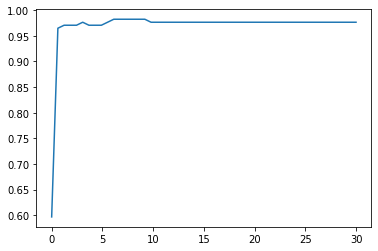

In [43]:
# C tune for rbf SVM

score = []
C_range = np.linspace(0.01,30,50) 

for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma = 0.012742749857031322,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))

print(max(score), C_range[score.index(max(score))]) 
plt.plot(C_range,score)
plt.show()

0.9824561403508771 5.938775510204081


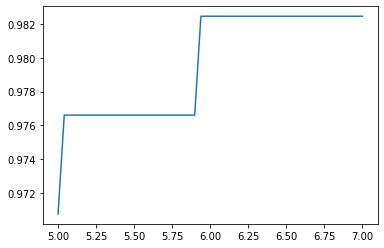

In [44]:
#refine for rbf 
score = []
C_range = np.linspace(5,7,50) 

for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma = 0.012742749857031322,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))

print(max(score), C_range[score.index(max(score))]) 
plt.plot(C_range,score)
plt.show()

In here, we find the best parameters for breast cancer dataset: for C = 5.938, gamma = 0.127, and kernel = rbf. We can further use pca to see if we can decreased features to get better modeling. 